## Justyna Cierniak, gr. II, Katowice


## Projekt zaliczeniowy
Bootcamp Data Science ING

## Temat 1: Przywidywanie cen mieszkań na podstawie danych z serwisu Otodom
Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny mieszkania o podanych cechach.
## cz. I

##    

## Pobranie danych

Do pobrania danych użyłam poniższego kodu (udostępninego przez prowadzącego).

Dane zostały pobrane 16 kwietnia 2019 r. i zapisane w formacie .json.

In [ ]:
# import scrapy
# from scrapy.crawler import CrawlerProcess
# from bs4 import BeautifulSoup
# import requests

# class OtodomBot(scrapy.Spider):
#     name = "otodom_scraper"
#     def start_requests(self):
#         base = "https://www.otodom.pl/sprzedaz/mieszkanie/katowice/?nrAdsPerPage=72&page="
#         for page_number in range(1, pages_all+1):
#             url = base+str(page_number)
#             yield scrapy.Request(url=url, callback=self.parse)
#     def parse(self, response):
#         urls = response.css("div.offer-item-details > header > h3 > a::attr(href)").extract()
#         for url in urls:
#             yield scrapy.Request(url=url, callback=self.parse_one_page)
#     def parse_one_page(self, response):
#         price = response.css("#root > div > article > header > div.css-15n3v4t-AdHeader-className > div.css-7ryazv-AdHeader-className::text").extract_first()
#         details = response.css("#root > div > article > div.css-k68zts-AdPageTemplate-className > div.css-b8lhu7-AdPageTemplate-className > section.section-overview > div.css-1v9yl6n-AdOverview-className > ul > li").extract()
#         if price is not None:
#             record = {"price": price,
#                   "details": details,
#                   "url": response.request.url}
#             real_estates.append(record)
# real_estates = [] 
# pages_all = 2000  
# process = CrawlerProcess()
# process.crawl(OtodomBot)
# process.start()

In [ ]:
# import json


# with open(r'JC_nieruchomosci.json', mode ='w') as file:
#     file.write(str(real_estates))


##    

Przygotowuję dane, aby można było z nich zrobić DataFrame.

In [1]:
import pandas as pd
import json
with open('JC_nieruchomosci.json', "r") as json_file:  
    data = json_file.read().replace("'", '"')
    with open('JC_nieruchomosci_v2.json', "w") as fixed_json_file:
        fixed_json_file.write(data)

data = ""
with open('JC_nieruchomosci_v2.json', 'r') as json_file:  
    data = json.load(json_file)

data

[{'price': '299 000 zł',
  'details': ['<li>Powierzchnia: <strong>40 m²</strong></li>',
   '<li>Liczba pokoi: <strong>2</strong></li>',
   '<li>Rynek: <strong>pierwotny</strong></li>',
   '<li>Rodzaj zabudowy: <strong>apartamentowiec</strong></li>',
   '<li>Piętro: <strong>2</strong></li>',
   '<li>Liczba pięter: <strong>8</strong></li>',
   '<li>Materiał budynku: <strong>pustak</strong></li>',
   '<li>Okna: <strong>plastikowe</strong></li>',
   '<li>Ogrzewanie: <strong>miejskie</strong></li>',
   '<li>Rok budowy: <strong>2019</strong></li>',
   '<li>Stan wykończenia: <strong>do zamieszkania</strong></li>',
   '<li>Forma własności: <strong>pełna własność</strong></li>'],
  'url': 'https://www.otodom.pl/oferta/kup-i-zamieszkaj-przy-dolinie-prawie-gotowe-ID3Yj8M.html#4b2b486214'},
 {'price': '275 709 zł',
  'details': ['<li>Powierzchnia: <strong>48,37 m²</strong></li>',
   '<li>Liczba pokoi: <strong>3</strong></li>',
   '<li>Rynek: <strong>pierwotny</strong></li>',
   '<li>Rodzaj zabudow

In [2]:
import re

import unidecode


key_reg = re.compile('<li>([^\:]+):\s+<strong>([^>]*)</strong></li>')

def remove_pl_chars(mystr):
    clean = unidecode.unidecode(mystr.lower())
    clean = clean.replace(' ', '_')
    clean = clean.replace('_m2', '')
    clean = clean.replace('/m2', '')
    clean = clean.replace('_zl', '')
    clean = clean.replace(',', '.')
    return clean


all = []


for item in data:
    new_item = {}
    new_item['cena'] = remove_pl_chars(item['price'])
    new_item['url'] = item['url']
    for detail in item["details"]:
        result = key_reg.match(detail)
        key = remove_pl_chars(result[1])
        value = remove_pl_chars(result[2])  
        #print(f"{key} => {value}")
        new_item[key] = value
    all.append(new_item)

df = pd.DataFrame(all)
df[["cena", "powierzchnia", "czynsz", "cena_za_od"]] = df[["cena", "powierzchnia", "czynsz", "cena_za_od"]].replace("_", '').replace('', 0).astype(float)

##    

Sprawdzam, czy powstał właściwy DataFrame

In [3]:
df.head()

,cena,cena_za_od,czynsz,dostepne_od,forma_wlasnosci,liczba_kondygnacji,liczba_pieter,liczba_pokoi,material_budynku,metraz_do,...,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_inwestycji,stan_wykonczenia,typ_oferowanych_nieruchomosci,url
0,299000.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,8,2,pustak,NaN,...,plastikowe,2,40.00,apartamentowiec,2019,pierwotny,NaN,do_zamieszkania,NaN,https://www.otodom.pl/oferta/kup-i-zamieszkaj-...
1,275709.0,NaN,NaN,NaN,NaN,NaN,10,3,NaN,NaN,...,plastikowe,1,48.37,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/nowa-inwestycja-m...
2,518891.0,NaN,NaN,NaN,NaN,NaN,10,4,zelbet,NaN,...,plastikowe,2,79.22,blok,NaN,pierwotny,NaN,NaN,NaN,https://www.otodom.pl/oferta/nowe-tysiaclecie-...
3,255000.0,NaN,NaN,NaN,pelna_wlasnosc,NaN,NaN,3,NaN,NaN,...,plastikowe,10,50.00,apartamentowiec,2019,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/narozny-apartamen...
4,290457.0,NaN,NaN,NaN,NaN,NaN,10,3,NaN,NaN,...,plastikowe,1,49.23,apartamentowiec,NaN,pierwotny,NaN,do_wykonczenia,NaN,https://www.otodom.pl/oferta/nowa-inwestycja-m...


In [4]:
df.shape

(2177, 22)

##   

## Czyszczenie danych

Sprawdzam jakie mam kolumny.

In [5]:
df.columns

Index(['cena', 'cena_za_od', 'czynsz', 'dostepne_od', 'forma_wlasnosci',
       'liczba_kondygnacji', 'liczba_pieter', 'liczba_pokoi',
       'material_budynku', 'metraz_do', 'metraz_od', 'ogrzewanie', 'okna',
       'pietro', 'powierzchnia', 'rodzaj_zabudowy', 'rok_budowy', 'rynek',
       'stan_inwestycji', 'stan_wykonczenia', 'typ_oferowanych_nieruchomosci',
       'url'],
      dtype='object')

Usuwam kolumnę 'url' - nie będzie miała wpływu na cenę.

In [6]:
df_clean = df.drop('url',axis=1)

Sprawdzam ilość obserwacji w poszczególnych kolumnach

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 21 columns):
cena                             2177 non-null float64
cena_za_od                       1 non-null float64
czynsz                           602 non-null float64
dostepne_od                      266 non-null object
forma_wlasnosci                  1469 non-null object
liczba_kondygnacji               1 non-null object
liczba_pieter                    1983 non-null object
liczba_pokoi                     2176 non-null object
material_budynku                 815 non-null object
metraz_do                        1 non-null object
metraz_od                        1 non-null object
ogrzewanie                       1732 non-null object
okna                             1453 non-null object
pietro                           2120 non-null object
powierzchnia                     2176 non-null float64
rodzaj_zabudowy                  1833 non-null object
rok_budowy                       977 non

Usuwam kolumny, które mają mniej niż połowę obserwacji - non-nulli (ustawiam theshold [minimalną liczbę obserwacji w kolumnie] na 970, by zostawić rok budowy- jest to cecha, która potencjalnie może mieć wpływ na cenę) 

In [8]:
df_clean=df_clean.dropna(axis=1,thresh=970)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 12 columns):
cena                2177 non-null float64
forma_wlasnosci     1469 non-null object
liczba_pieter       1983 non-null object
liczba_pokoi        2176 non-null object
ogrzewanie          1732 non-null object
okna                1453 non-null object
pietro              2120 non-null object
powierzchnia        2176 non-null float64
rodzaj_zabudowy     1833 non-null object
rok_budowy          977 non-null object
rynek               2176 non-null object
stan_wykonczenia    1458 non-null object
dtypes: float64(2), object(10)
memory usage: 204.2+ KB


Pozostało mi 12 kolumn, które posiadały najwięcej danych. Teraz będę je analizowała po kolei.

##  

## cena

Sprawdzam kolumnę, która będzie szacowana (cena)

In [10]:
df_clean.sort_values('cena',ascending=False)

,cena,forma_wlasnosci,liczba_pieter,liczba_pokoi,ogrzewanie,okna,pietro,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia
600,5665000.0,pelna_wlasnosc,3,wiecej_niz_10,gazowe,drewniane,NaN,1622.23,kamienica,NaN,pierwotny,do_remontu
240,5430000.0,pelna_wlasnosc,5,wiecej_niz_10,miejskie,NaN,4,834.08,NaN,1942,wtorny,do_wykonczenia
33,3614125.0,pelna_wlasnosc,7,1,NaN,NaN,2,35.59,NaN,2021,pierwotny,NaN
431,3350000.0,NaN,5,wiecej_niz_10,miejskie,plastikowe,NaN,640.00,blok,NaN,wtorny,NaN
859,2600000.0,NaN,3,5,miejskie,plastikowe,3,180.00,apartamentowiec,NaN,wtorny,NaN
873,2600000.0,pelna_wlasnosc,2,5,miejskie,plastikowe,2,172.10,apartamentowiec,2018,wtorny,do_zamieszkania
1951,1517340.0,NaN,4,4,NaN,plastikowe,4,137.94,apartamentowiec,NaN,wtorny,do_wykonczenia
1954,1499000.0,pelna_wlasnosc,4,3,miejskie,drewniane,2,115.00,kamienica,NaN,wtorny,do_zamieszkania
2015,1386550.0,NaN,4,4,NaN,plastikowe,4,126.05,apartamentowiec,NaN,pierwotny,do_wykonczenia
1925,1200000.0,NaN,3,5,NaN,NaN,2,172.00,NaN,1937,wtorny,NaN


Widzę, że w 1 pzypadku cena = 0.0, a w kolumnach są same Nan-y- usuwam ten wiersz

In [11]:
df_clean = df_clean.drop(index=1050, axis=0)

Sprawdzam na wykresie wartości odstające (już z sotowania wyszło mi, że takie są)

In [12]:
import matplotlib.pyplot as plt 

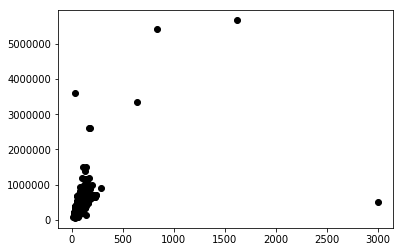

In [13]:
plt.scatter(df_clean.powierzchnia,df_clean.cena, color='black')
plt.show()

Usuwam wiersze, dla których cena drastycznie odstaje od reszty > 1.2 mln

In [14]:
df_clean.drop(df_clean[(df_clean['cena'] > 1200000)].index, inplace = True)

Usuwam także wiersze, dla których powierzchnia drastycznie odstaje od reszty > 500 m2 (kolumna ta będzie szczegółowo analizowana później)

In [15]:
df_clean.drop(df_clean[(df_clean['powierzchnia'] > 500)].index, inplace = True)

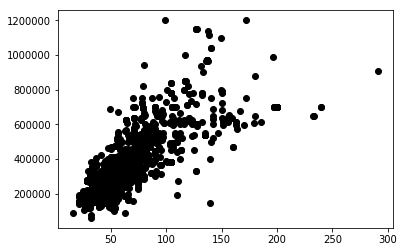

In [16]:
plt.scatter(df_clean.powierzchnia,df_clean.cena, color='black')
plt.show()

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2176
Data columns (total 12 columns):
cena                2166 non-null float64
forma_wlasnosci     1463 non-null object
liczba_pieter       1974 non-null object
liczba_pokoi        2166 non-null object
ogrzewanie          1726 non-null object
okna                1446 non-null object
pietro              2113 non-null object
powierzchnia        2166 non-null float64
rodzaj_zabudowy     1826 non-null object
rok_budowy          974 non-null object
rynek               2166 non-null object
stan_wykonczenia    1452 non-null object
dtypes: float64(2), object(10)
memory usage: 220.0+ KB


##  

Teaz po kolei "czyszczę" pozostałe kolumny

## forma_wlasnosci

In [18]:
df_clean.forma_wlasnosci.value_counts()

pelna_wlasnosc               1304
spoldzielcze_wlasnosciowe      97
spoldzielcze_wl._z_kw          61
udzial                          1
Name: forma_wlasnosci, dtype: int64

Zamieniam 'spoldzielcze_wl._z_kw' i 'udzial' na 'spoldzielcze__wlasnosciowe' - uznaję, że są tożsame

In [19]:
df_clean.loc[df_clean['forma_wlasnosci'] == 'spoldzielcze_wl._z_kw', 'forma_wlasnosci'] = 'spoldzielcze_wlasnosciowe'
df_clean.loc[df_clean['forma_wlasnosci'] == 'udzial', 'forma_wlasnosci'] = 'spoldzielcze_wlasnosciowe'

Zamieniam Nan-y na wartość występującą najczęściej, tj. 'pelna__wlasnosc'

In [20]:
df_clean["forma_wlasnosci"] = df_clean['forma_wlasnosci'].fillna('pelna_wlasnosc')

In [21]:
df_clean.forma_wlasnosci.value_counts()

pelna_wlasnosc               2007
spoldzielcze_wlasnosciowe     159
Name: forma_wlasnosci, dtype: int64

Ponad 90% obserwacji w kolumnie forma_wlasnosci jest taka sama - usuwam ją

In [22]:
df_clean= df_clean.drop(['forma_wlasnosci'],axis=1)

In [23]:
df_clean.columns

Index(['cena', 'liczba_pieter', 'liczba_pokoi', 'ogrzewanie', 'okna', 'pietro',
       'powierzchnia', 'rodzaj_zabudowy', 'rok_budowy', 'rynek',
       'stan_wykonczenia'],
      dtype='object')

## liczba_pieter

In [24]:
df_clean.liczba_pieter.value_counts()

4     440
5     408
10    343
3     177
2     163
6     100
8      94
7      64
1      40
16     26
13     22
18     20
11     19
14     15
9      15
12     10
15      9
24      4
17      3
25      1
19      1
Name: liczba_pieter, dtype: int64

Zamieniam Nan-y na wartość występującą najczęściej '4'

In [25]:
df_clean["liczba_pieter"] = df_clean['liczba_pieter'].fillna('4')

Mam już same wartości liczbowe, zamieniam format 'object' na 'float'

In [26]:
df_clean["liczba_pieter"] = df_clean['liczba_pieter'].astype('float')

In [27]:
df_clean.liczba_pieter.value_counts()

4.0     632
5.0     408
10.0    343
3.0     177
2.0     163
6.0     100
8.0      94
7.0      64
1.0      40
16.0     26
13.0     22
18.0     20
11.0     19
14.0     15
9.0      15
12.0     10
15.0      9
24.0      4
17.0      3
19.0      1
25.0      1
Name: liczba_pieter, dtype: int64

## liczba_pokoi

In [28]:
df_clean.liczba_pokoi.value_counts()

2                844
3                687
4                348
1                169
5                 55
7                 29
8                 25
6                  7
wiecej_niz_10      1
9                  1
Name: liczba_pokoi, dtype: int64

Zamieniam 'wiecej_niz_10' na '10'

In [29]:
df_clean.loc[df_clean['liczba_pokoi'] == 'wiecej_niz_10', 'liczba_pokoi'] = '10'

Mam już same wartości liczbowe, zamieniam format 'object' na 'float'

In [30]:
df_clean["liczba_pokoi"] = df_clean['liczba_pokoi'].astype('float')

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2176
Data columns (total 11 columns):
cena                2166 non-null float64
liczba_pieter       2166 non-null float64
liczba_pokoi        2166 non-null float64
ogrzewanie          1726 non-null object
okna                1446 non-null object
pietro              2113 non-null object
powierzchnia        2166 non-null float64
rodzaj_zabudowy     1826 non-null object
rok_budowy          974 non-null object
rynek               2166 non-null object
stan_wykonczenia    1452 non-null object
dtypes: float64(4), object(7)
memory usage: 203.1+ KB


## ogrzewanie

In [32]:
df_clean.ogrzewanie.value_counts()

miejskie         1545
gazowe             95
inne               48
elektryczne        29
kotlownia           7
piece_kaflowe       2
Name: ogrzewanie, dtype: int64

In [33]:
missing = df_clean['ogrzewanie'].isnull().sum()
missing

440

Dane w kolumnie są mało zróżnicowane (71% z nich stanowi 1 obserwacja, a 20% to braki) --> usuwam kolumnę

In [34]:
df_clean= df_clean.drop(['ogrzewanie'],axis=1)

## okna

In [35]:
df_clean.okna.value_counts()

plastikowe    1303
drewniane      109
aluminiowe      34
Name: okna, dtype: int64

In [36]:
missing = df_clean['okna'].isnull().sum()
missing

720

Dane w kolumnie są mało zróżnicowane (60% z nich stanowi 1 obserwacja, a 33% to braki) --> usuwam kolumnę

In [37]:
df_clean= df_clean.drop(['okna'],axis=1)

## pietro

In [38]:
df_clean.pietro.value_counts()

1           425
parter      423
2           332
3           319
4           194
5           102
&gt;_10      67
6            63
8            61
7            54
10           42
9            29
suterena      1
poddasze      1
Name: pietro, dtype: int64

In [39]:
missing = df_clean['pietro'].isnull().sum()
missing

53

Zamieniam wartości tekstowe na liczby

In [40]:
df_clean.loc[df_clean['pietro'] == '&gt;_10', 'pietro'] = '10' #zamieniam "&gt;_10" na "10"
df_clean.loc[df_clean['pietro'] == 'suterena', 'pietro'] = '0' #zamieniam "suterena" na "0"
df_clean.loc[df_clean['pietro'] == 'parter', 'pietro'] = '0'#zamieniam "parter" na "0"
df_clean.loc[df_clean['pietro'] == 'poddasze', 'pietro'] = '5'#zamieniam "poddasze" na "5", bo 5 pięter w bloku

Zamieniam Nan-y na wartość występującą najczęściej '1'

In [41]:
df_clean["pietro"] = df_clean['pietro'].fillna('1')

Mam już same wartości liczbowe, zamieniam format 'object' na 'float'

In [42]:
df_clean["pietro"] = df_clean['pietro'].astype('float')

In [43]:
df_clean.pietro.value_counts()

1.0     478
0.0     424
2.0     332
3.0     319
4.0     194
10.0    109
5.0     103
6.0      63
8.0      61
7.0      54
9.0      29
Name: pietro, dtype: int64

## powierzchnia

In [44]:
df_clean.powierzchnia.value_counts()

72.00     38
40.00     30
50.00     30
60.00     26
45.00     25
200.00    25
135.00    25
46.61     24
41.00     23
104.00    23
70.00     23
63.00     22
46.00     22
45.14     22
51.00     20
34.00     20
91.00     19
35.00     19
59.00     18
51.50     16
38.00     16
39.00     16
52.00     16
45.10     16
82.28     15
46.38     15
55.00     14
61.00     14
48.00     14
49.00     13
          ..
47.10      1
32.83      1
46.28      1
49.50      1
122.00     1
47.60      1
99.00      1
156.00     1
164.00     1
98.00      1
180.00     1
118.00     1
50.27      1
40.69      1
196.00     1
60.20      1
90.36      1
83.37      1
82.39      1
79.51      1
80.92      1
105.40     1
49.26      1
67.81      1
95.97      1
138.06     1
54.40      1
136.06     1
33.90      1
36.62      1
Name: powierzchnia, Length: 672, dtype: int64

Nie ma Nanów, typ = float --> jest ok

## rodzaj_zabudowy

In [45]:
df_clean.rodzaj_zabudowy.value_counts()

apartamentowiec     1000
blok                 610
kamienica            180
szeregowiec           18
dom_wolnostojacy      18
Name: rodzaj_zabudowy, dtype: int64

In [46]:
missing = df_clean['rodzaj_zabudowy'].isnull().sum()
missing

340

Zamieniam pojedyncze wartości na 1 kategorię - "dom"

In [47]:
df_clean.loc[df_clean['rodzaj_zabudowy'] == 'szeregowiec', 'rodzaj_zabudowy'] = 'dom' 
df_clean.loc[df_clean['rodzaj_zabudowy'] == 'dom_wolnostojacy', 'rodzaj_zabudowy'] = 'dom' 

Zamieniam Nan-y na wartość "średnią" - 'blok'

In [48]:
df_clean["rodzaj_zabudowy"] = df_clean['rodzaj_zabudowy'].fillna('blok')

In [49]:
df_clean.rodzaj_zabudowy.value_counts()

apartamentowiec    1000
blok                950
kamienica           180
dom                  36
Name: rodzaj_zabudowy, dtype: int64

In [50]:
missing = df_clean['rodzaj_zabudowy'].isnull().sum()
missing

0

## rynek

In [51]:
df_clean.rynek.value_counts()

pierwotny    1192
wtorny        974
Name: rynek, dtype: int64

In [52]:
missing = df_clean['rynek'].isnull().sum()
missing

0

Jest ok--> brak Nan-ów

## stan_wykonczenia

In [53]:
df_clean.stan_wykonczenia.value_counts()

do_wykonczenia     875
do_zamieszkania    421
do_remontu         156
Name: stan_wykonczenia, dtype: int64

In [54]:
missing = df_clean['stan_wykonczenia'].isnull().sum()
missing

714

Brakuje ponad 700 obserwacji -ok 30%, ale nie chcę tracić tej kolumny, w mojej ocenie może ona mieć znaczący wpływ na cenę. Tworzę osobną kategorię 'nieznany' i zamieniam Nan-y na wartość "nieznany'.

In [55]:
df_clean["stan_wykonczenia"] = df_clean['stan_wykonczenia'].fillna('nieznany')

In [56]:
df_clean.stan_wykonczenia.value_counts()

do_wykonczenia     875
nieznany           714
do_zamieszkania    421
do_remontu         156
Name: stan_wykonczenia, dtype: int64

##  rok_budowy

In [57]:
df_clean.rok_budowy.value_counts()


2019    348
2018    113
2020    105
1980     59
1920     30
2021     26
2017     19
1970     18
1960     16
2010     13
2013     12
2008     12
2015     10
1990     10
1905      9
1900      9
2009      8
2016      7
1976      7
1910      7
1930      7
2012      6
1979      6
2000      6
2002      6
2014      5
1978      5
1975      5
1981      4
1950      4
       ... 
2011      2
2001      2
1994      2
1955      2
1914      2
2006      2
2005      1
1937      1
1986      1
1939      1
1967      1
1998      1
1919      1
1936      1
1968      1
1995      1
1912      1
1935      1
1940      1
1938      1
1945      1
1896      1
1880      1
1893      1
1892      1
1902      1
1901      1
1904      1
1988      1
1973      1
Name: rok_budowy, Length: 78, dtype: int64

In [58]:
missing = df_clean['rok_budowy'].isnull().sum()
missing

1192

Jest dużo 'missingów', ale kolumna może być znacząca - zostawiam ją.

Zamieniam format 'object' na 'float', by policzyć średnią, medianę itd

In [59]:
df_clean["rok_budowy"] = df_clean['rok_budowy'].astype('float')

In [60]:
df_clean.rok_budowy.mean()

2000.7217659137577

In [61]:
df_clean.rok_budowy.median()

2018.0

Wypełniam Nan-y średnią - '2000'

In [62]:
df_clean["rok_budowy"] = df_clean['rok_budowy'].fillna('2000').astype(float)

In [63]:
df_clean.rok_budowy.value_counts()


2000.0    1198
2019.0     348
2018.0     113
2020.0     105
1980.0      59
1920.0      30
2021.0      26
2017.0      19
1970.0      18
1960.0      16
2010.0      13
2008.0      12
2013.0      12
2015.0      10
1990.0      10
1900.0       9
1905.0       9
2009.0       8
2016.0       7
1910.0       7
1976.0       7
1930.0       7
1979.0       6
2002.0       6
2012.0       6
1975.0       5
1978.0       5
2014.0       5
1981.0       4
1985.0       4
          ... 
1966.0       2
1955.0       2
1911.0       2
1933.0       2
1994.0       2
2011.0       2
1938.0       1
1880.0       1
1935.0       1
1940.0       1
1937.0       1
1892.0       1
1901.0       1
1919.0       1
2005.0       1
1968.0       1
1967.0       1
1912.0       1
1902.0       1
1893.0       1
1988.0       1
1995.0       1
1945.0       1
1936.0       1
1896.0       1
1904.0       1
1986.0       1
1973.0       1
1998.0       1
1939.0       1
Name: rok_budowy, Length: 78, dtype: int64

In [64]:
missing = df_clean['rok_budowy'].isnull().sum()
missing

0

Skończyłam "czyścić" poszczególne kolumny, jeszcze raz dla pewności sprawdzam, czy nie ma jakiś braków.

In [65]:
braki = df_clean.isnull().sum()
braki

cena                0
liczba_pieter       0
liczba_pokoi        0
pietro              0
powierzchnia        0
rodzaj_zabudowy     0
rok_budowy          0
rynek               0
stan_wykonczenia    0
dtype: int64

Dane tekstowe zamieniam na dane liczbowe. Dotyczy to 3 kolumn:
 rynek, 
 rodzaj_zabudowy, 
 stan_wykonczenia.

In [66]:
clean_dummies = pd.get_dummies(df_clean[['rynek', 'rodzaj_zabudowy', 'stan_wykonczenia']])

In [67]:
clean_dummies.head()

,rynek_pierwotny,rynek_wtorny,rodzaj_zabudowy_apartamentowiec,rodzaj_zabudowy_blok,rodzaj_zabudowy_dom,rodzaj_zabudowy_kamienica,stan_wykonczenia_do_remontu,stan_wykonczenia_do_wykonczenia,stan_wykonczenia_do_zamieszkania,stan_wykonczenia_nieznany
0,1,0,1,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0


Usuwam zamienione kolumny z df_clean

In [68]:
df_clean=df_clean.drop(['rynek', 'rodzaj_zabudowy','stan_wykonczenia'], axis=1).astype('float64')

Dołączam nowo zamienione kolumny:

- rynek- biorę 1 kolumnę, bo są tylko 2 - więc 1 da nam tą samą informację.

- rodzaj_zabudowy - biorę wszytskie 4

- stan_wykonczenia - biorę 3 (bez "nieznanego").

In [69]:
df_clean=pd.concat([df_clean, clean_dummies[['rynek_pierwotny','rodzaj_zabudowy_apartamentowiec','rodzaj_zabudowy_blok', 'rodzaj_zabudowy_dom', 'rodzaj_zabudowy_kamienica', 'stan_wykonczenia_do_remontu', 'stan_wykonczenia_do_wykonczenia', 'stan_wykonczenia_do_zamieszkania']]], axis=1).astype('float64')

Sprawdzam jak ostatecznie będzie wyglądał df_clean - czy są wszystkie kolumny i wiersze (niepuste)

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2176
Data columns (total 14 columns):
cena                                2166 non-null float64
liczba_pieter                       2166 non-null float64
liczba_pokoi                        2166 non-null float64
pietro                              2166 non-null float64
powierzchnia                        2166 non-null float64
rok_budowy                          2166 non-null float64
rynek_pierwotny                     2166 non-null float64
rodzaj_zabudowy_apartamentowiec     2166 non-null float64
rodzaj_zabudowy_blok                2166 non-null float64
rodzaj_zabudowy_dom                 2166 non-null float64
rodzaj_zabudowy_kamienica           2166 non-null float64
stan_wykonczenia_do_remontu         2166 non-null float64
stan_wykonczenia_do_wykonczenia     2166 non-null float64
stan_wykonczenia_do_zamieszkania    2166 non-null float64
dtypes: float64(14)
memory usage: 253.8 KB


In [71]:
df_clean.head()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy,rynek_pierwotny,rodzaj_zabudowy_apartamentowiec,rodzaj_zabudowy_blok,rodzaj_zabudowy_dom,rodzaj_zabudowy_kamienica,stan_wykonczenia_do_remontu,stan_wykonczenia_do_wykonczenia,stan_wykonczenia_do_zamieszkania
0,299000.0,8.0,2.0,2.0,40.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,275709.0,10.0,3.0,1.0,48.37,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,518891.0,10.0,4.0,2.0,79.22,2000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,255000.0,4.0,3.0,10.0,50.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,290457.0,10.0,3.0,1.0,49.23,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Zapisuję dane, przygotowane do modelowania w pliku .csv

In [72]:
df_clean.to_csv('JC_df_clean') 